In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [270]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

In [271]:
df.duplicated().sum()

0

There are no duplicate values

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [273]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [274]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights 

All the means are very close to each other, i.e. 66.08, 69.16 and 68.05

All the std are very close to each other, i.e. 15.16, 14.6 and 15.19

There is a huge difference in min scores i.e. for maths min score is 0, for reading min score is 17 and for writting min score is 10

The max score is same for all i.e. 100



In [275]:
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:  ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:  ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:   ['none' 'completed']


In [276]:
# Numerical and Categorical column
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print('We have {} numerical_features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical_features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical_features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical_features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns for "Total Score" and "Average"

In [277]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [278]:
math_full = df[df['math_score']==100]['average'].count()
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()

print(f'Number of students with full marks in Maths : {math_full}')
print(f'Number of students with full marks in Reading : {reading_full}')
print(f'Number of students with full marks in Writing : {writing_full}')

Number of students with full marks in Maths : 7
Number of students with full marks in Reading : 17
Number of students with full marks in Writing : 14


In [279]:
math_less_20 = df[df['math_score']<=20]['average'].count()
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()

print(f'Number of students with less than 20 marks in Maths : {math_less_20}')
print(f'Number of students with less than 20 marks in Reading : {reading_less_20}')
print(f'Number of students with less than 20 marks in writing : {writing_less_20}')

Number of students with less than 20 marks in Maths : 4
Number of students with less than 20 marks in Reading : 1
Number of students with less than 20 marks in writing : 3


Insights

Students have performed best in Reading
Students have performed worst in Maths

Exploring Data (Visualization)

Visualize average score distribution to make some conclusion
Histogram
Kernal Distribution Function


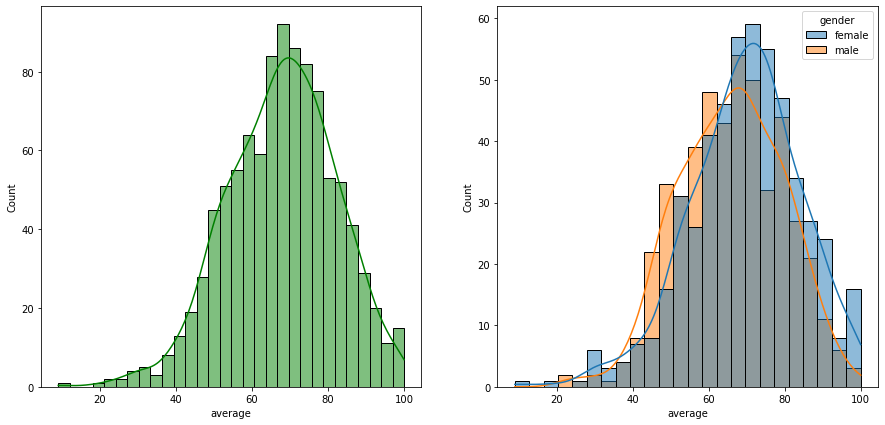

In [280]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True, hue='gender')
plt.show()


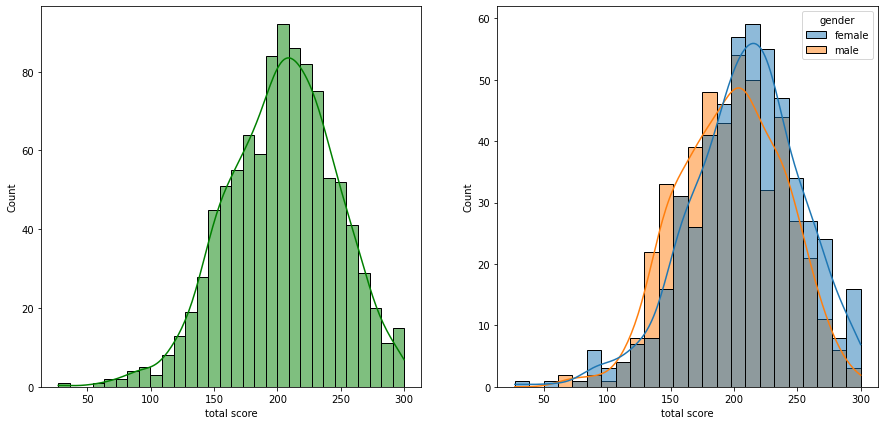

In [281]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

Insight
Female student perform well than male student

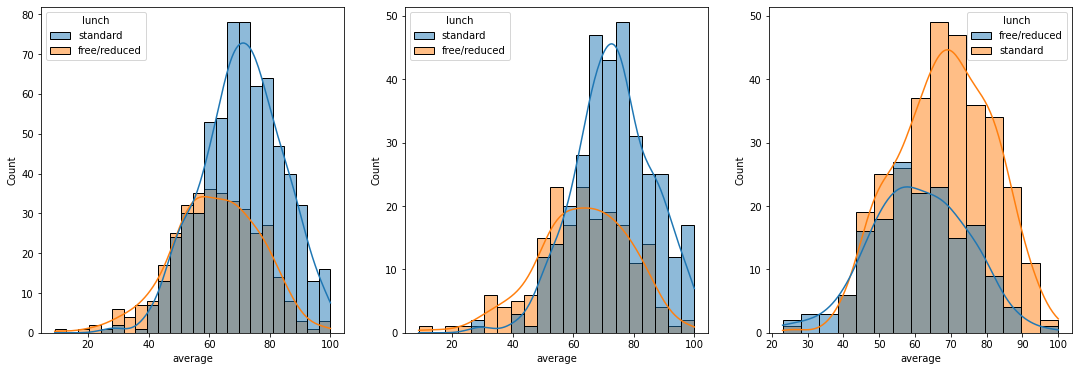

In [282]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()


Standard lunch helps perform well in exams

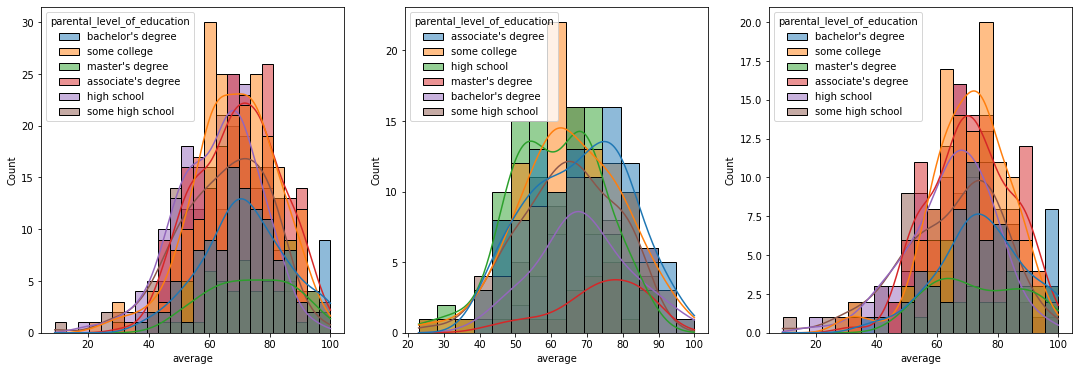

In [283]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()


Parents whose education is of associate degree or masters degree there male childrens perform well in exam.
There is no effect of parent's education on female students.

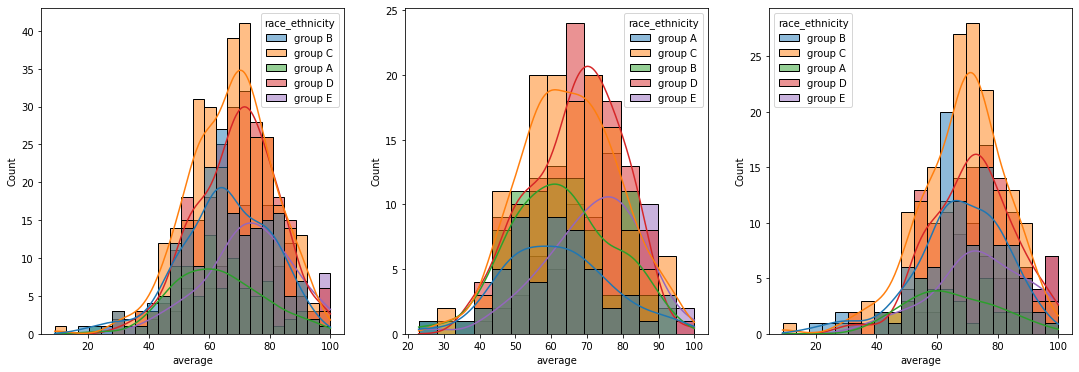

In [284]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#### Maximum score of students in all three subjects

Students of group A, group B and group E did not perform well irrespective of whether they are male or female

<AxesSubplot:title={'center':'Writting Scores'}, ylabel='writing_score'>

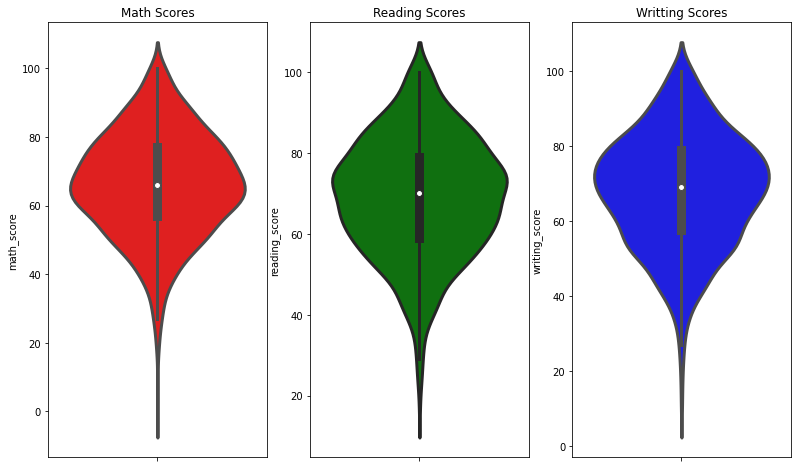

In [285]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Scores')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writting Scores')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)


In above plot we can see that mostly students have scored between 60-80 in maths and students have scored between 50-80 in reading and writting

## Multivariate Analysis using pieplot

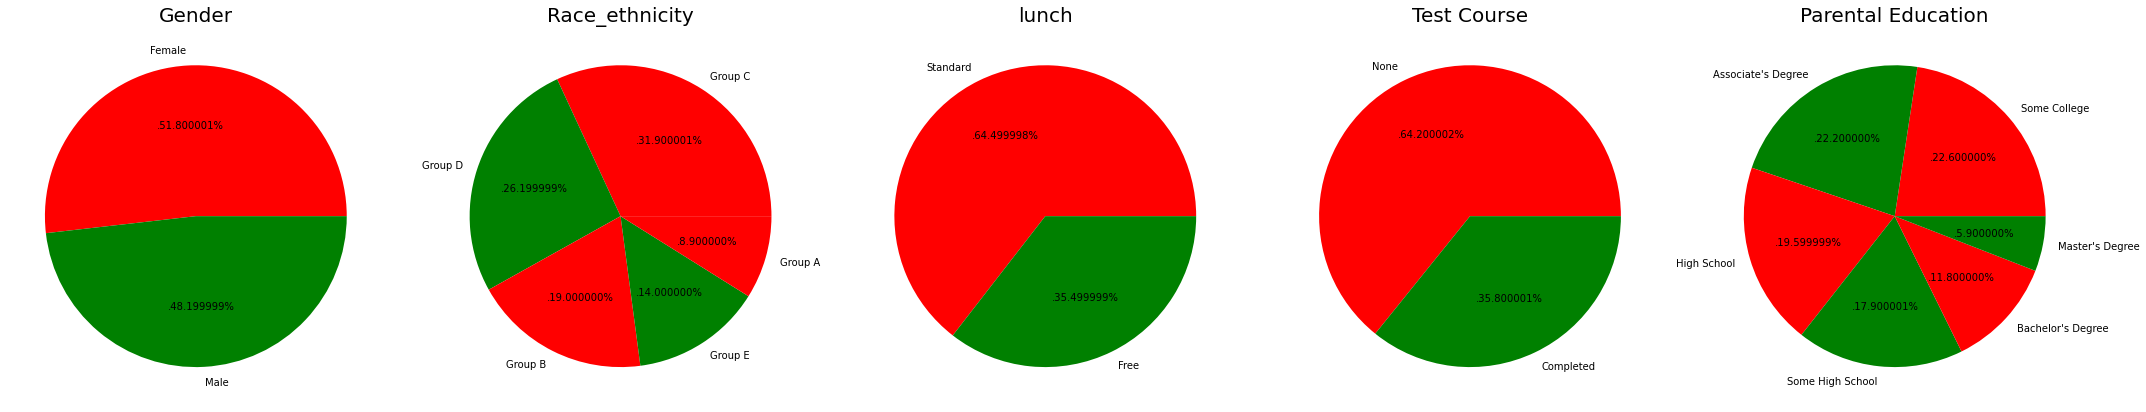

In [286]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
lables = 'Female','Male'
color = ['red','green']

plt.pie(size, colors = color, labels=lables,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
lables = 'Group C','Group D','Group B','Group E','Group A'

plt.pie(size, colors = color, labels=lables,autopct='.%2f%%')
plt.title('Race_ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard','Free'
color = ['red','green']

plt.pie(size, colors=color,labels=labels,autopct='.%2f%%')
plt.title('lunch', fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'None','Completed'
color = 'red','green'

plt.pie(size, colors=color,labels=labels,autopct='.%2f%%')
plt.title('Test Course',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = 'red','green'

plt.pie(size, colors=color,labels=labels,autopct='.%2f%%')
plt.title('Parental Education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()




Number of male students are more than female students
Group with highest number of students is Group C
Number of students with standard lunch are more than number of students with free lunch
Number of students in test preparation are more in none category than number of students in completed category
Number of students whose parental level of education has some college degree are more followed by the number of students whose parental level of education has master's degree


## Univariate Analysis (Gender Distribution)

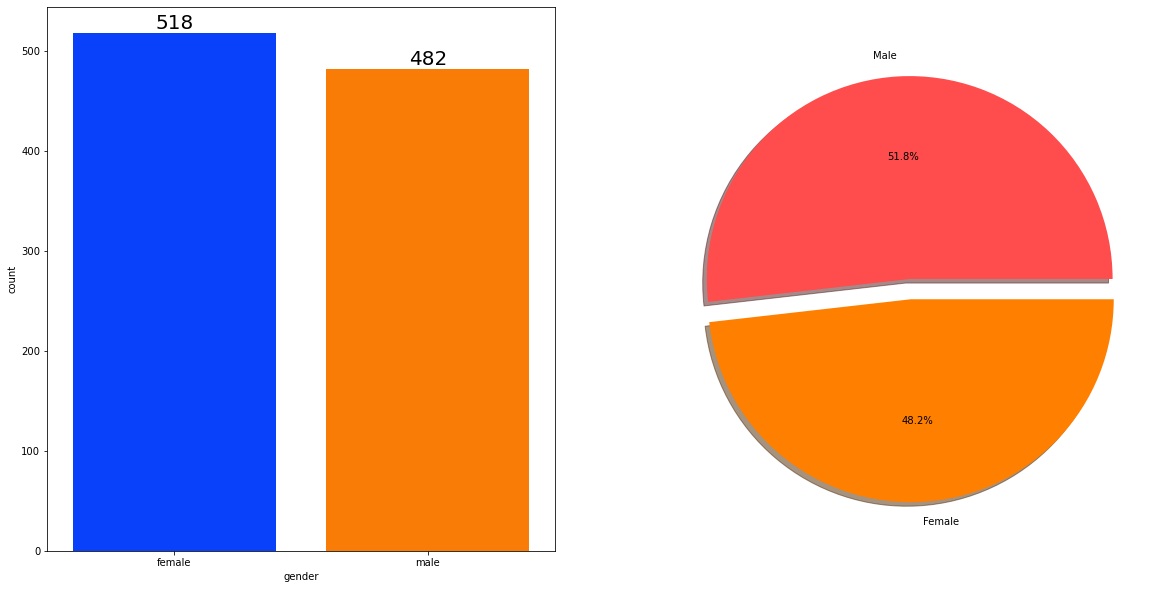

In [287]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Males are more than Females

## Bivariate Anallysis(Impact of gender on student performance)

In [288]:
gender_group=df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


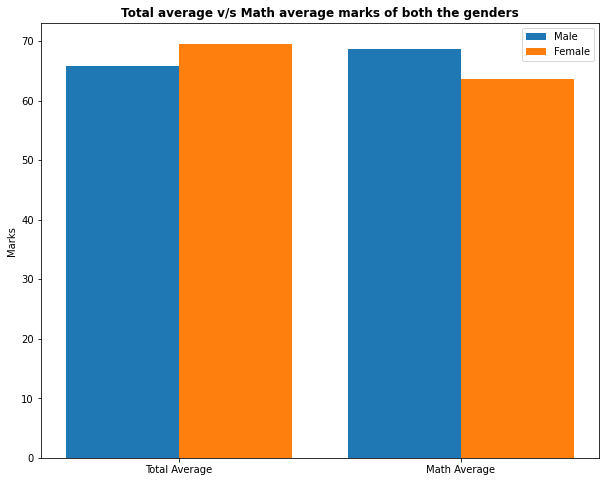

In [289]:
plt.figure(figsize=(10,8))
X = ['Total Average','Math Average']

female_scores = [gender_group['average'][0],gender_group['math_score'][0]]
male_scores = [gender_group['average'][1],gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Total Average of females is good than males
Math average of males is good than females

## Univariate Analysis(Race_Ethnicity Group Wise Distribution) 

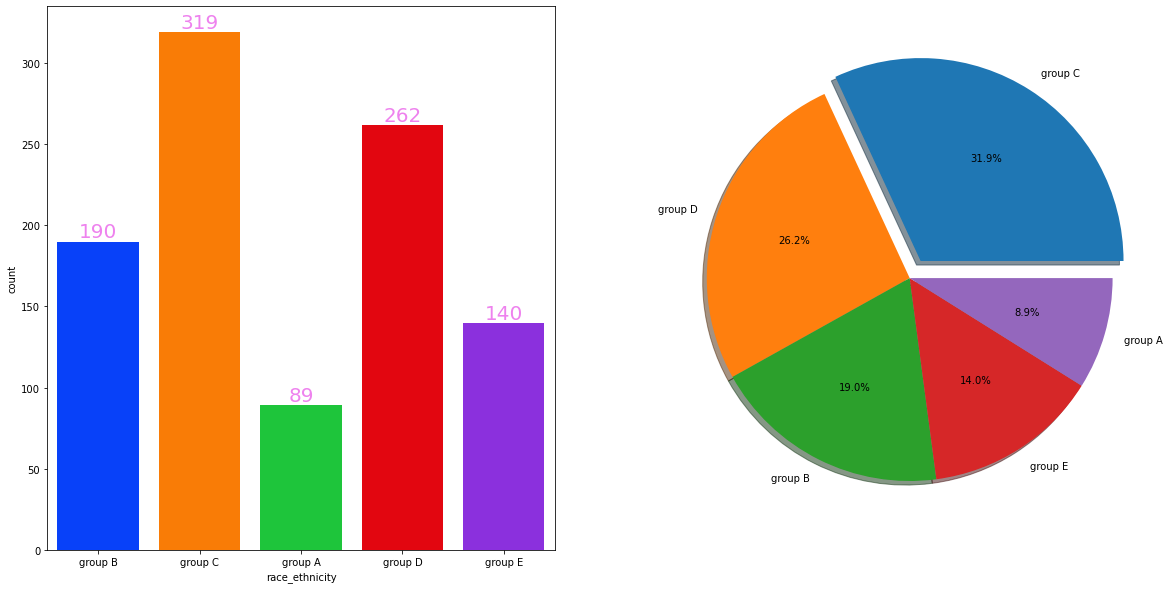

In [306]:
f, ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='violet',size=20)
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)    
plt.show()

Most of thee students are from group C and group D
Minimum number of students are from group A

## Bivariate Anlysis(Impact of Race_Ethnicity on student performance)

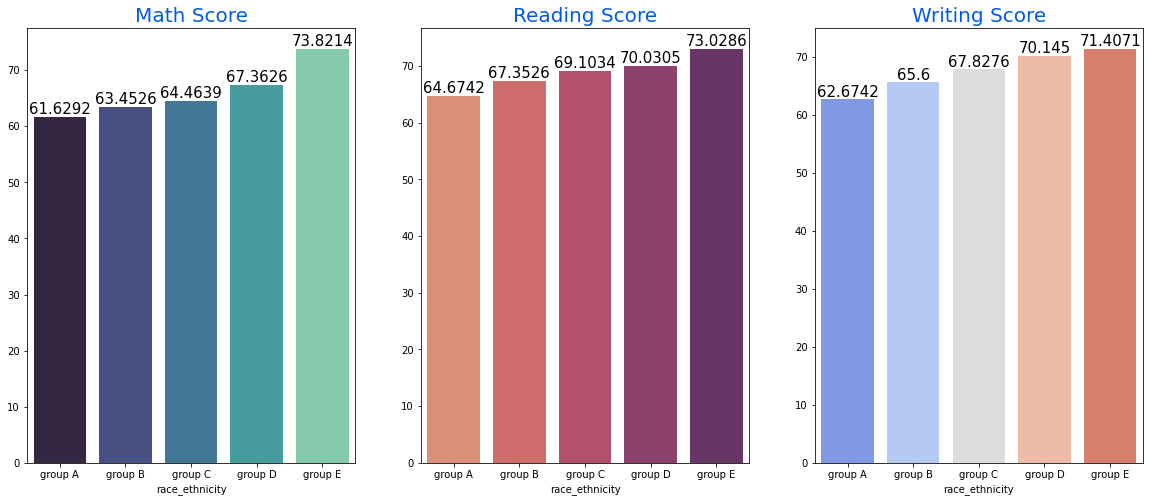

In [326]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math Score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette='flare',ax=ax[1]) 
ax[1].set_title('Reading Score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette='coolwarm') 
ax[2].set_title('Writing Score',color='#005ce6',size=20)  

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)  



Students from group E have scored highest marks in all subjects
Students from group A have scored lowest marks in all subjects

## Parental level of education

What is the education background of student's parent 
Is parental education has any impact on student's performance

#### Univariate Analysis(What is the education background of student's parent)

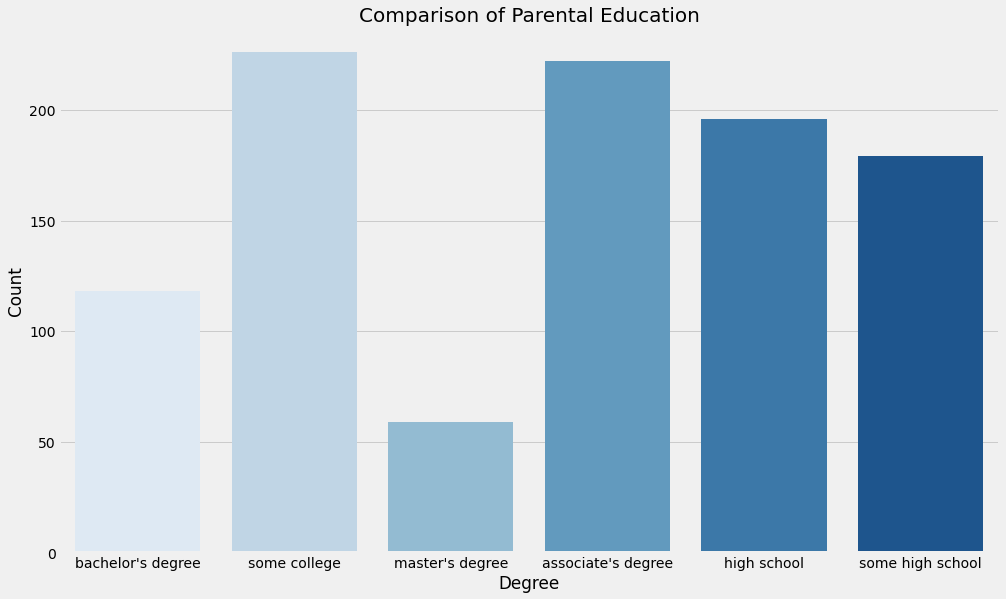

In [348]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

Largest number of student's parents are from some college 

## Bivariate Analysis(Is Parental Education has any impact on Student's Performance)

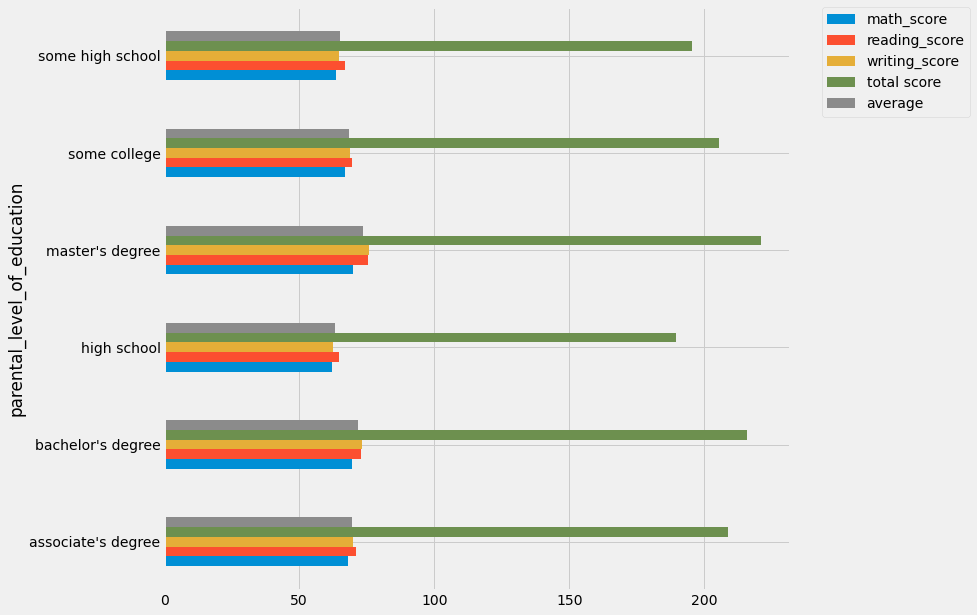

In [346]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

The score of students whose parents have some masters or bachelor degree are more than other students 

## Lunch Column

Which type of lunch is most common among students
What is the effect of lunch type on test results

## Univariate Analysis(Which type of lunch is most common among students)

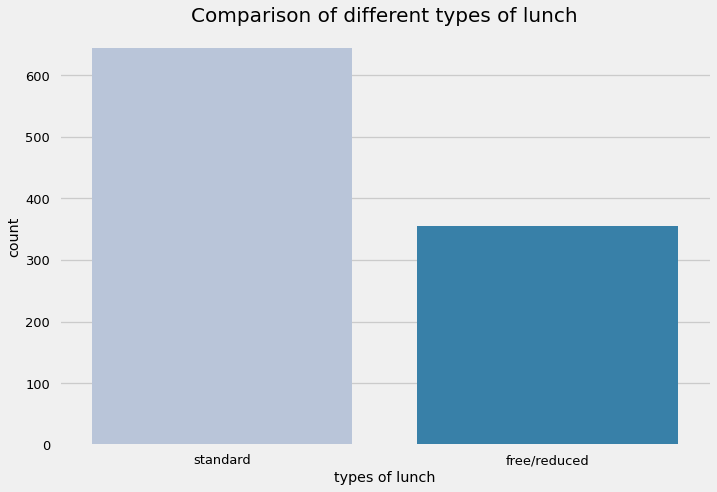

In [354]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'],palette='PuBu')
plt.title('Comparison of different types of lunch',fontweight=30,fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Standard lunch is more common than free/reduced lunch among students 

## Bivariate Analysis(What is the effect of lunch type on test results)

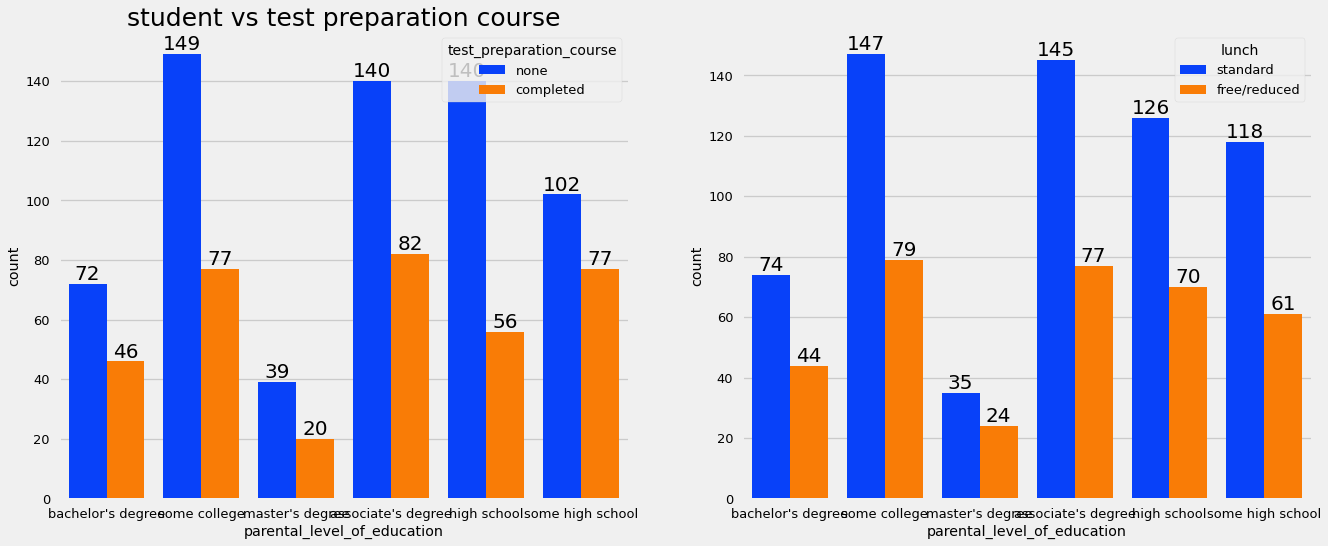

In [363]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette= 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('student vs test preparation course',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
sns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='lunch',saturation=0.95,ax=ax[1])  
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)


students who have got standard lunch have performed well than the students who have free/reduced lunch

## Test preparation course column

Is test preparation course has any impact on student's performance 

## Bivariate Analysis(Is test preparation course has any impact on student's performance )

<AxesSubplot:xlabel='lunch', ylabel='writing_score'>

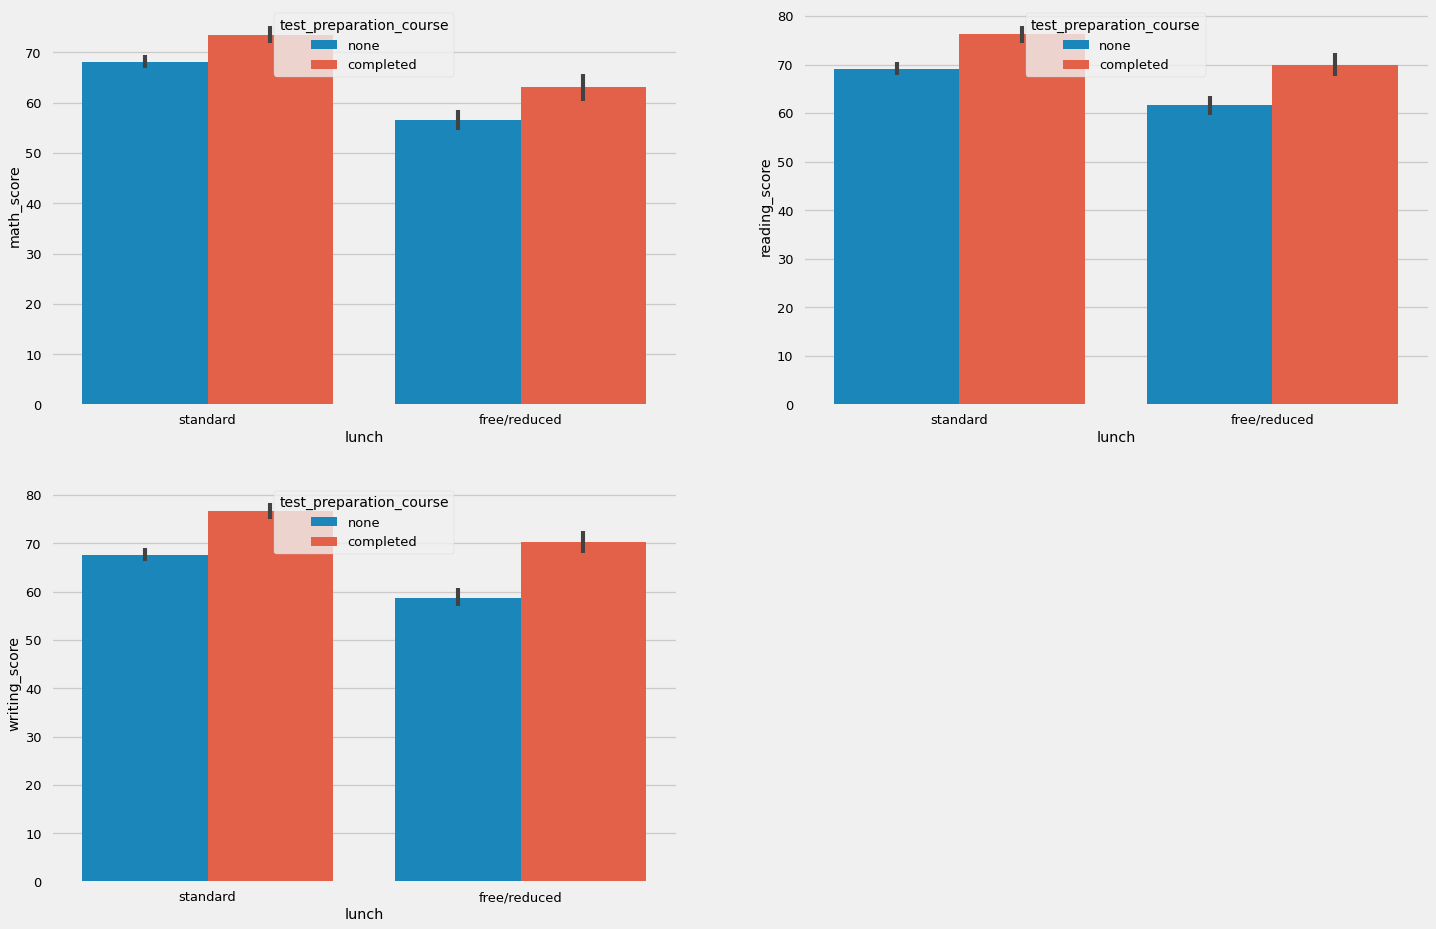

In [368]:
plt.figure(figsize=(22,15))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'],y=df['math_score'],hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'],y=df['reading_score'],hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'],y=df['writing_score'],hue=df['test_preparation_course'])

Students who have completed test preparation course have more score than the students who have not completed test preparation course

## Checking Outliers

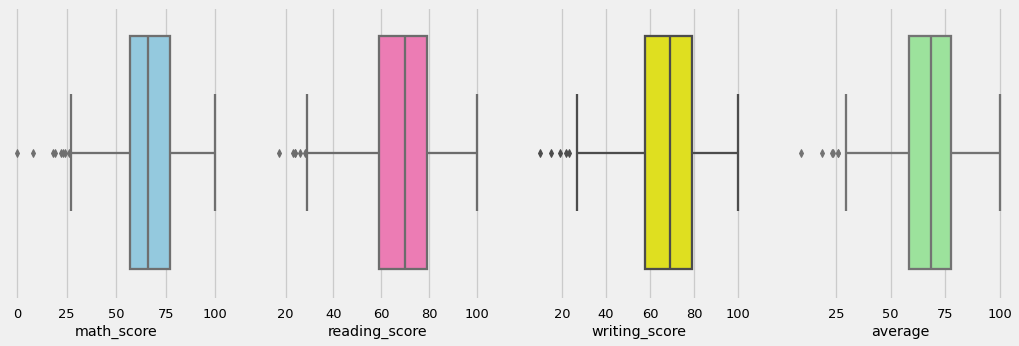

In [373]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

## Multivariatee Analysis Using Pairplot

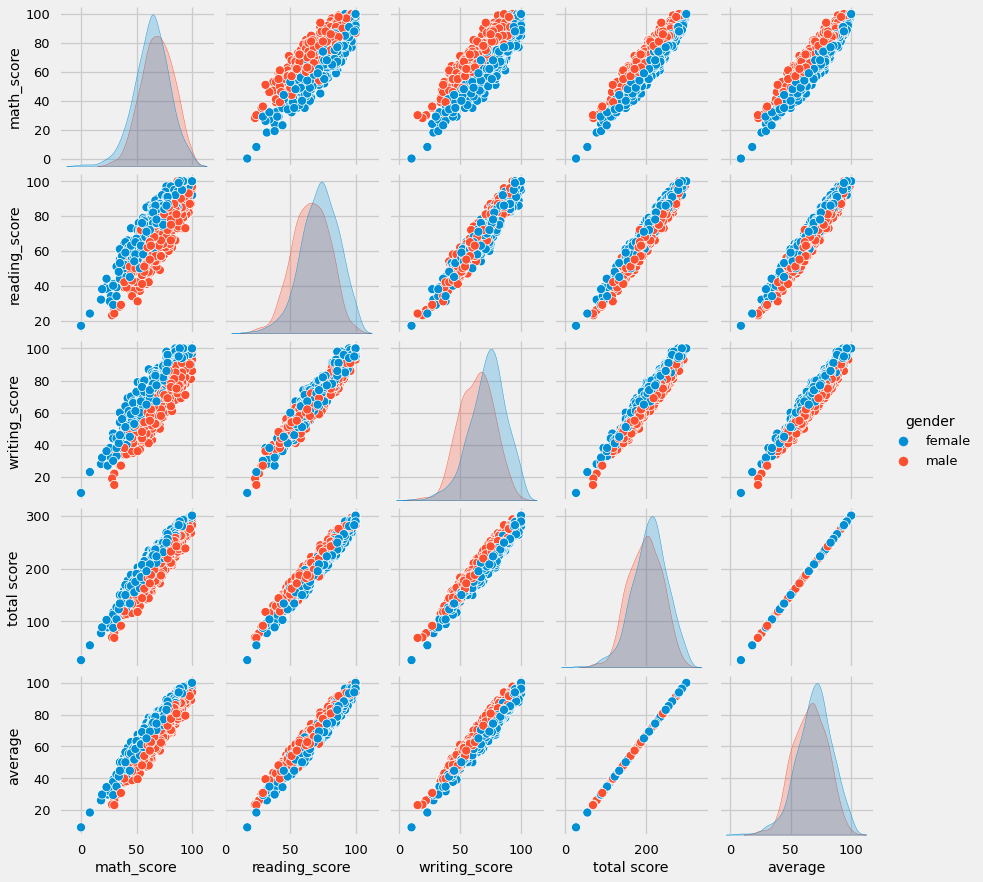

In [374]:
sns.pairplot(df,hue='gender')
plt.show()

From above pllot it is clear that al the scores increase linearly with each other